In [3]:
# Algoritma Dynamic :
# Deret Fibonacci dengan Rekursi

def recur_fibo(n):
  if n <= 1:
    return n
  else:
    return(recur_fibo(n-1) + recur_fibo(n-2))

nterms = 20

# cek apakah nilai nterms valid
if nterms <= 0:
  print("Please enter a positive integer")
else:
  print("Fibonacci sequence: ")
  for i in range(nterms):
    print(recur_fibo(i))

Fibonacci sequence: 
0
1
1
2
3
5
8
13
21
34
55
89
144
233
377
610
987
1597
2584
4181


In [39]:
# The Travelling Salesperson Problem
import matplotlib
import matplotlib.pyplot as plt
import random
import time
import itertools

In [9]:
# Try all tours (exact_TSP)
def exact_TSP(cities):
  "Generate all possible tours of the cities and choose te shortest one."
  return shortest(alltours(cities))

def shortest(tours):
  "Return the tour with the minimum total distance."
  return min(tours, key = total_distance)

In [40]:
#Representing Tours
alltours = itertools.permutations # The permutation function is already defined in the itertools module

cities = {1, 2, 3}

list(alltours(cities))

[(1, 2, 3), (1, 3, 2), (2, 1, 3), (2, 3, 1), (3, 1, 2), (3, 2, 1)]

In [38]:
#Representing Cities and Distance
def total_distance(tour):
  "The total distance between each pair of consecutive cities in the tour."
  return sum(distance(tour[i], tour[i-1]) for i in range (len(tour)))

  city = complex

In [23]:
#Representing Cities and Distance
def total_distance(tour):
  "The total distance between each pair of consecutive cities in the tour."
  return sum(distance(tour[i], tour[i-1]) for i in range (len(tour)))

In [41]:

# Representing Cities and Distance
def total_distance(tour):
    "The total distance between each pair of consecutive cities in the tour."
    return sum(distance(tour[i], tour[i-1]) for i in range(len(tour)))

City = complex

def distance(A, B):
  "The distance between two points."
  return abs(A - B)

A = City(300, 0)
B = City(0, 400)

distance(A, B)


500.0

In [44]:
# We'll set the random seed so that these sets are the same every time we run this notebook
random.seed('seed')
cities8, cities10, cities100, cities1000, cities10000= Cities(8), Cities(10), Cities(100), Cities(1000), Cities(10000)
cities8


{(151+70j),
 (252+365j),
 (303+506j),
 (498+96j),
 (54+361j),
 (551+542j),
 (684+435j),
 (800+430j)}

In [43]:
# Make a set of random Cities
def Cities(n):
  "Make a set of n cities, each with random coordinates."
  return set(City(random.randrange(10, 890), random.randrange(10, 590)) for c in range(n))

In [45]:
# Apply the exact TSP function to find the minimal tour

tour = exact_TSP(cities8)

print(tour)
print(total_distance(tour))

((551+542j), (303+506j), (252+365j), (54+361j), (151+70j), (498+96j), (800+430j), (684+435j))
1990.388372313552


In [46]:
# Try All Non-Redundant Tours
def alltours(cities):
  "Return a list of tours, each a permutation of cities, but each one starting with the same city."
  start = first(cities)
  return [[start] + list(tour)
  for tour in itertools.permutations(cities - {start})]

def first(collection):
  "Start iterating over collection, and return the first element."
  for x in collection:
    return x


In [47]:
alltours({1, 2, 3})

[[1, 2, 3], [1, 3, 2]]

In [49]:
alltours({1, 2, 3,4})

[[1, 2, 3, 4],
 [1, 2, 4, 3],
 [1, 3, 2, 4],
 [1, 3, 4, 2],
 [1, 4, 2, 3],
 [1, 4, 3, 2]]

In [50]:
tour = exact_TSP(cities8)

print(tour)
print(total_distance(tour))

[(551+542j), (303+506j), (252+365j), (54+361j), (151+70j), (498+96j), (800+430j), (684+435j)]
1990.388372313552


8 city tour; total distance = 1990.4; time = 0.023 secs for exact_TSP
10 city tour; total distance = 2050.3; time = 1.384 secs for exact_TSP


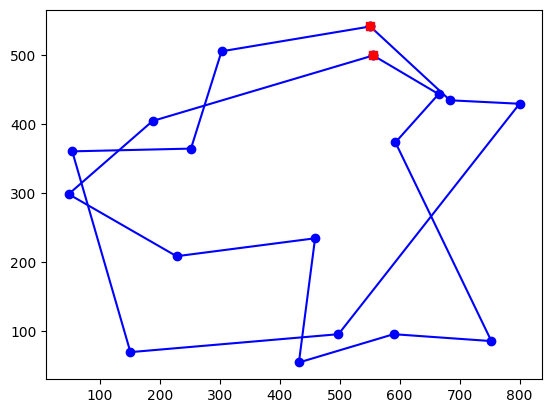

In [51]:
# Plotting
def plot_tour(algorithm, cities):
  "Apply a TSP algorithm to cities, and plot the resulting tour."
  # Find the solution and time long it takes
  t0 = time.time()
  tour = algorithm(cities)
  t1 = time.time()
  # Plot the tour as blue lines between blue circles, and the starting city as a red square.
  plotline(list(tour) + [tour[0]])
  plotline([tour[0]], 'rs')
  plt.show
  print("{} city tour; total distance = {:.1f}; time = {:.3f} secs for {}".format(
      len(tour), total_distance(tour), t1-t0, algorithm.__name__))

def plotline(points, style = 'bo-'):
  "Plot a list of points (complex numbers) in the 2-D plane."
  X, Y = XY(points)
  plt.plot(X, Y, style)

def XY(points):
  "Given a list of points, return two lists: X coordinates, and Y coordinates."
  return [p.real for p in points], [p.imag for p in points]

plot_tour(exact_TSP, cities8)

plot_tour(exact_TSP, cities10)

9 city tour; total distance = 2004.6; time = 0.091 secs for exact_TSP
9 city tour; total distance = 2199.1; time = 0.000 secs for greedy_TSP
100 city tour; total distance = 6987.7; time = 0.001 secs for greedy_TSP
1000 city tour; total distance = 20529.4; time = 0.076 secs for greedy_TSP


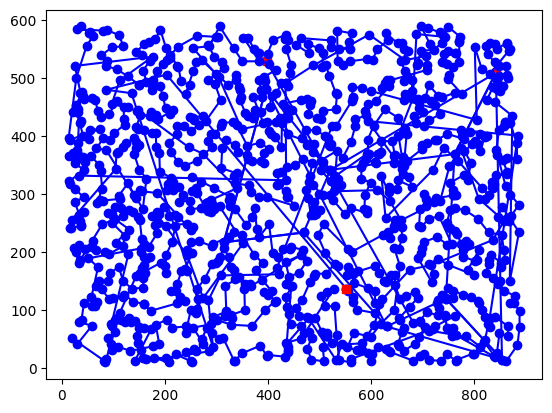

In [52]:
# Greedy Nearest Neighbor (greedy_TSP)
def greedy_TSP(cities):
  "At each step, visit the nearest neighbor that is still unvisited"
  start = first(cities)
  tour = [start]
  unvisited = cities - {start}
  while unvisited:
    C = nearest_neighbor(tour[-1], unvisited)
    tour.append(C)
    unvisited.remove(C)
  return tour

def nearest_neighbor(A, cities):
  "Find the city in cities that is nearest to city A."
  return min(cities, key = lambda x: distance(x, A))

cities = Cities(9)
plot_tour(exact_TSP, cities)

plot_tour(greedy_TSP, cities)

plot_tour(greedy_TSP, cities100)

plot_tour(greedy_TSP, cities1000)

In [54]:
# Algorithm 3: Greed Neares Neighbor from All starting Points (all_greedy_TSP)
def all_greedy_TSP(cities):
  "Try the greedy algorithm from each of the starting cities: return the shortest tour."
  return shortest(greedy_TSP(cities, start=c) for c in cities)

In [55]:
#We will modify greedy_TSP to take an optional start city; otherwise it is unchanged.

def greedy_TSP(cities, start=None):
  "At each step, visit the nearest neighbor that is still unvisited."
  if start is None: start = first(cities)
  tour = [start]
  unvisited = cities - {start}
  while unvisited:
    C = nearest_neighbor(tour[-1], unvisited)
    tour.append(C)
    unvisited.remove(C)
  return tour

100 city tour; total distance = 6987.7; time = 0.001 secs for greedy_TSP
100 city tour; total distance = 6213.5; time = 0.081 secs for all_greedy_TSP


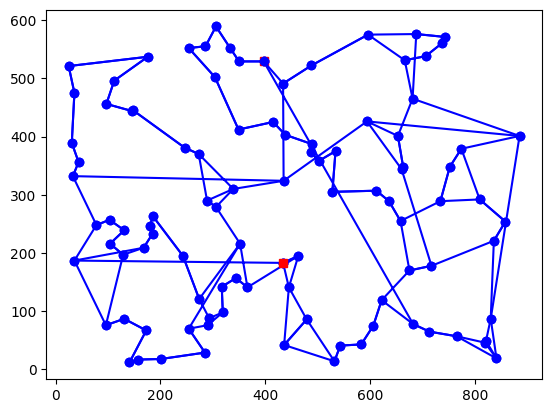

In [56]:
# Compare greedy_TSP to all_greedy_TSP
plot_tour(greedy_TSP, cities100)

plot_tour(all_greedy_TSP, cities100)


100 city tour; total distance = 6987.7; time = 0.102 secs for greedy_exact_end_TSP
1000 city tour; total distance = 20171.0; time = 0.165 secs for greedy_exact_end_TSP


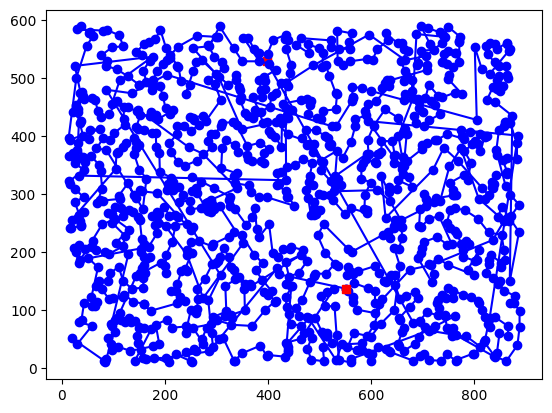

In [57]:
# Algorithm 4: Greedy Nearest Neighbor with Exact End (greedy_exact_end_TSP)

def greedy_exact_end_TSP(cities, start=None, end_size=8):
  "At each step, visit the nearest neighbor that is still unvisited untill there are k_end cities left; then choose the best ofall possible endings."
  if start is None:
    start = first(cities)
    tour = [start]
    unvisited = cities - {start}
    # Use greedy algoritm for all but the last end_size cities
    while len(unvisited) > end_size:
      C = nearest_neighbor(tour[-1], unvisited)
      tour.append(C)
      unvisited.remove(C)

    ends = map(list, itertools.permutations(unvisited))
    best = shortest([tour[0], tour[-1]] + end for end in ends)
    return tour + best[2:]

plot_tour(greedy_exact_end_TSP, cities100)

plot_tour(greedy_exact_end_TSP, cities1000)

In [63]:
# Algorithm 5: Greedy Nearest Neighbor with Both Ends Search (greedy_bi_TSP)

def greedy_bi_TSP(cities, start_size=12, end_size=6):
  "At each step, visit the nearest neighbor that is still unvisited."
  starts = random.sample(cities, min(len(cities), start_size))
  return shortest(greedy_exact_end_TSP(cities, start, end_size) for start in starts)



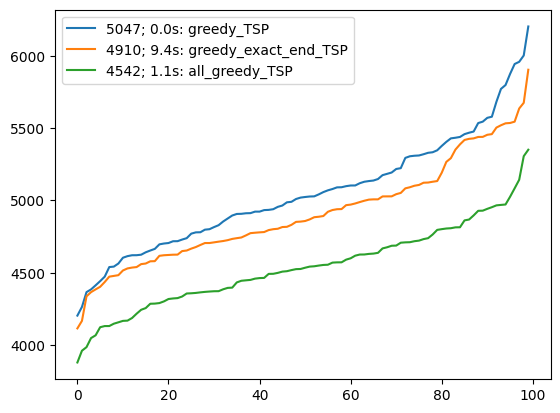

100 x 50-city maps


In [64]:
# Benchmarking Algorithms
def compare_algorithms(algorithms, maps):
  "Apply each algorithm to each map and plot results."
  for algorithm in algorithms:
    t0 = time.time()
    results = [total_distance(algorithm(m)) for m in maps]
    t1 = time.time()
    avg = sum(results) / len(results)
    label = '{:.0f}; {:.1f}s: {}'.format(avg, t1-t0, algorithm.__name__)
    plt.plot(sorted(results), label=label)
  plt.legend(loc=2)
  plt.show()
  print('{} x {}-city maps'.format(len(maps), len(maps[0])))

def Maps(M, N):
  "Return a list of M maps, each consisting of a set of N cities."
  return [Cities(N) for m in range(M)]

compare_algorithms([greedy_TSP, greedy_exact_end_TSP, all_greedy_TSP], Maps(100, 50))